In [2884]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2885]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [2886]:
train_copy = train.copy()    #not remove outliers, linear regression, log & normalize grade, Robust scaler
train_copy1 = train.copy()   #remove outliers, not remove Multicollinary, linear regression, log & normalize grade, Standard scaler
train_copy2 = train.copy()   #delete outliers, remove Multicollinary, linear regression, log & normalize grade, Standard scaler

In [2887]:
test_copy = test.copy()    #not remove outliers, linear regression, Robust scaler, normalize grade
test_copy1 = test.copy()   #remove outliers, not remove Multicollinary, linear regression, Standard scaler, normalize grade
test_copy2 = test.copy()   #delete outliers, remove Multicollinary, linear regression, Standard scaler, normalize grade

In [2888]:
grade_original = train.grade
grade_original

0      14
1      10
2      12
3       9
4      12
       ..
481    12
482    15
483     9
484     8
485     1
Name: grade, Length: 486, dtype: int64

In [2889]:
s = (train.dtypes == 'object')
object_cols = list(s[s].index)
print(object_cols)

['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']


In [2890]:
# One Hot Encoder
train_copy = pd.get_dummies(train_copy, columns = ['Mjob', 'Fjob', 'reason', 'guardian'])
test_copy = pd.get_dummies(test_copy, columns = ['Mjob', 'Fjob', 'reason', 'guardian'])
train_copy.columns

Index(['ID', 'school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu',
       'Fedu', 'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup',
       'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic',
       'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences',
       'grade', 'Mjob_at_home', 'Mjob_health', 'Mjob_other', 'Mjob_services',
       'Mjob_teacher', 'Fjob_at_home', 'Fjob_health', 'Fjob_other',
       'Fjob_services', 'Fjob_teacher', 'reason_course', 'reason_home',
       'reason_other', 'reason_reputation', 'guardian_father',
       'guardian_mother', 'guardian_other'],
      dtype='object')

In [2891]:
from numpy import asarray
from sklearn.preprocessing import OrdinalEncoder
cate = ['school', 'sex', 'address', 'famsize', 'Pstatus', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']
encoder = OrdinalEncoder()

train_copy[cate] = encoder.fit_transform(train_copy[cate])
test_copy[cate] = encoder.fit_transform(test[cate])
train_copy

,ID,school,sex,age,address,famsize,Pstatus,Medu,Fedu,traveltime,...,Fjob_other,Fjob_services,Fjob_teacher,reason_course,reason_home,reason_other,reason_reputation,guardian_father,guardian_mother,guardian_other
0,177,0.0,0.0,17,1.0,0.0,1.0,2,2,1,...,1,0,0,1,0,0,0,0,1,0
1,368,0.0,0.0,15,1.0,0.0,1.0,2,2,1,...,1,0,0,1,0,0,0,0,1,0
2,120,0.0,1.0,17,1.0,0.0,1.0,1,2,2,...,0,1,0,0,0,1,0,0,0,1
3,230,1.0,0.0,17,0.0,0.0,1.0,1,1,3,...,0,1,0,0,0,0,1,0,1,0
4,353,0.0,0.0,18,1.0,1.0,1.0,2,2,1,...,1,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
481,307,0.0,0.0,15,1.0,0.0,1.0,1,1,1,...,0,1,0,1,0,0,0,1,0,0
482,297,1.0,0.0,16,1.0,0.0,1.0,1,1,1,...,1,0,0,1,0,0,0,1,0,0
483,324,1.0,0.0,17,0.0,0.0,1.0,2,2,1,...,1,0,0,0,0,1,0,0,1,0
484,73,0.0,1.0,18,1.0,0.0,1.0,2,2,1,...,0,1,0,0,0,0,1,1,0,0


Text(0.5, 1.0, 'Correlation Heatmap')

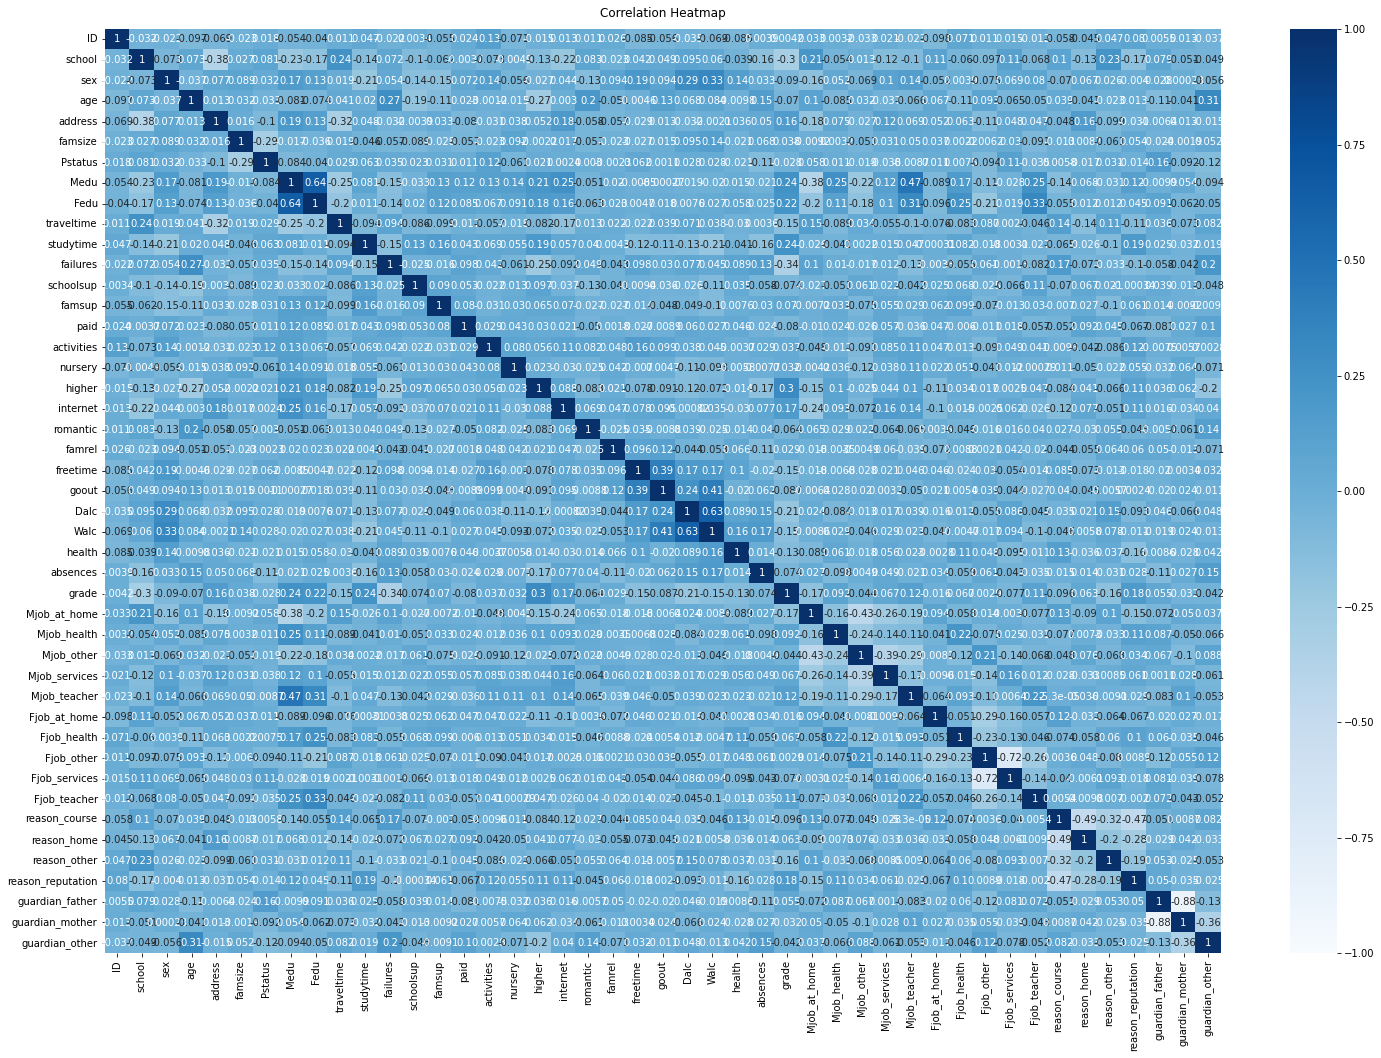

In [2892]:
plt.figure(figsize=(25,17))
heatmap = sns.heatmap(train_copy.corr(), vmin=-1, vmax=1, cmap="Blues", annot=True)
heatmap.set_title("Correlation Heatmap", fontdict={'fontsize':12}, pad=12)

In [2893]:
# Multicollinary
# Medu - Fedu: drop Fedu
# Walc - Dalc: drop Walc
# Medu - Mjob: drop Mjob
# freetime - goout: drop freetime

In [2894]:
# Multicollinary
# Fjob_other - Fjob_services: drop Fjob_services
# guardian_father - guardian_mother: drop guardian_father
# Medu - Fedu: drop Fedu
# Walc - Dalc: drop Walc
# drop Mjob_teachers
# drop reason_home
# drop reason_reputation

In [2895]:
"""
for col in train_copy.loc[:, train_copy.columns!='grade']:
  percentiles = train_copy[col].quantile([0.05, 0.95]).values
  train_copy[col][train_copy[col] <= percentiles[0]] = percentiles[0]
  train_copy[col][train_copy[col] >= percentiles[1]] = percentiles[1]
"""

"\nfor col in train_copy.loc[:, train_copy.columns!='grade']:\n  percentiles = train_copy[col].quantile([0.05, 0.95]).values\n  train_copy[col][train_copy[col] <= percentiles[0]] = percentiles[0]\n  train_copy[col][train_copy[col] >= percentiles[1]] = percentiles[1]\n"

In [2896]:
from scipy import stats
from scipy.stats import norm, skew

train_copy = train_copy.drop(train_copy[train_copy['grade'] < 1.5].index)
"""
train_copy["grade"] = np.log1p(train_copy["grade"])

sns.distplot(train_copy['grade'] , fit=norm);

(mu, sigma) = norm.fit(train_copy['grade'])
#print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)], loc='best')
plt.ylabel('Frequency')
plt.title('Grade distribution')
"""

'\ntrain_copy["grade"] = np.log1p(train_copy["grade"])\n\nsns.distplot(train_copy[\'grade\'] , fit=norm);\n\n(mu, sigma) = norm.fit(train_copy[\'grade\'])\n#print( \'\n mu = {:.2f} and sigma = {:.2f}\n\'.format(mu, sigma))\n\n#Plot the distribution\nplt.legend([\'Normal dist. ($\\mu=$ {:.2f} and $\\sigma=$ {:.2f} )\'.format(mu, sigma)], loc=\'best\')\nplt.ylabel(\'Frequency\')\nplt.title(\'Grade distribution\')\n'

In [2897]:
from sklearn import preprocessing
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import mean_squared_error
import xgboost as xgb

In [2898]:
grade_log = train_copy["grade"]

In [2899]:
del train_copy["grade"]
del train_copy["Fedu"]
del train_copy["Walc"]
del test_copy["Fedu"]
del test_copy["Walc"]
del train_copy["Fjob_services"]
del test_copy["Fjob_services"]
"""
del train_copy["guardian_father"]
del test_copy["guardian_father"]
"""

'\ndel train_copy["guardian_father"]\ndel test_copy["guardian_father"]\n'

In [2900]:
# XGBoost
import xgboost as xgb
from xgboost.sklearn import XGBClassifier
"""
classifier = XGBClassifier(n_estimators=500, max_depth=11, learning_rate=0.05, subsample=0.9, colsample_bytree=0.7, missing=-999, random_state=2020, tree_method='gpu_hist')

fit2 = classifier.fit(train_copy, grade_log.tolist())
train_XGB = fit2.predict(test_copy)
pred_XGB = np.expm1(train_XGB)
"""


"\nclassifier = XGBClassifier(n_estimators=500, max_depth=11, learning_rate=0.05, subsample=0.9, colsample_bytree=0.7, missing=-999, random_state=2020, tree_method='gpu_hist')\n\nfit2 = classifier.fit(train_copy, grade_log.tolist())\ntrain_XGB = fit2.predict(test_copy)\npred_XGB = np.expm1(train_XGB)\n"

In [2901]:
"""
from sklearn.ensemble import GradientBoostingClassifier

clf = GradientBoostingClassifier()
fit2 = clf.fit(train_copy, grade_log.tolist())
train_XGB = fit2.predict(test_copy)
pred_XGB = np.expm1(train_XGB)
"""

'\nfrom sklearn.ensemble import GradientBoostingClassifier\n\nclf = GradientBoostingClassifier()\nfit2 = clf.fit(train_copy, grade_log.tolist())\ntrain_XGB = fit2.predict(test_copy)\npred_XGB = np.expm1(train_XGB)\n'

In [2902]:
#regr_XGB = xgb.XGBRegressor(learning_rate=0.1, max_depth=5, n_estimators=150, random_state=0, silent=True)

regr_XGB = xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
                             learning_rate=0.05, max_depth=1, 
                             min_child_weight=1.7817, n_estimators=100,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample= 0.5213, silent=1,
                             random_state =6, nthread = -1)  
 
"""
regr_XGB = xgb.XGBRegressor()

tuned_parameters = [{'max_depth': [5, 10, 15, 20, 25, 30], 'learning_rate': [0.001, 0.01, 0.1, 0.5], 'n_estimators': [100, 150, 200, 250, 300]}]
MSE_xgb = ['mean_squared_error(y_test, pred_XGB)']

for value in MSE_xgb:
  regr_XGB = GridSearchCV(xgb.XGBRegressor(silent=True), tuned_parameters, cv=4)
  regr_XGB.fit(train_copy, grade_log.tolist())
  y_true, pred_XGB = y_test, regr_XGB.predict(test_copy)

print(regr_XGB.best_params_)
"""

fit2 = regr_XGB.fit(train_copy, grade_log.tolist())
train_XGB = fit2.predict(test_copy)
#pred_XGB = np.expm1(train_XGB)

#print(rmsle(grade_log.tolist(), train_XGB))


In [2903]:
print(train_XGB)

[12.171558  12.731233  10.795396  12.636257  10.67176   10.17285
 10.645334  13.083168  10.421659  10.256736  12.734707  12.970975
 12.55847    9.673676  13.168871  12.557784  11.785555  12.8781185
 13.386437  12.286086  13.342222  12.369687  10.140203  13.741894
  9.266028  12.516427  12.249063  12.022912  12.533958  12.063967
 12.417814  13.309501  12.673002  12.482323  13.211719  12.1306
 13.218991  12.055886  13.295886  13.278544   8.427042   9.795139
 12.692326  12.97718   12.318231  12.910834  12.740957  11.944932
 11.886248  10.579356  12.436483   9.037259  12.687602  12.373798
 12.5093975 12.037568  12.865697  12.444195  11.287938  12.096929
 12.795893   9.996221  11.798068  13.41689   12.792592  12.523658
 12.282436  13.744964  12.562751  13.761696  13.490371   8.745091
 12.988977  11.986751  11.191812  13.3220415  8.852595   9.9925585
 11.835776  13.287218  12.6752405 13.157443  13.270517  11.008736
 10.024899  13.965725  12.688215  12.58945   13.3909025 12.774121
 13.556013 

In [2904]:
from sklearn.model_selection import train_test_split

#X_train, X_test, y_train, y_test = train_test_split(train_copy, grade_log, random_state=0, test_size=0.33539)
X_train, X_test, y_train, y_test = train_test_split(train_copy, grade_log, random_state=0, test_size=0.34388)

In [2905]:
y_test

76     11
91     12
254    16
210    15
445    13
       ..
306    14
64     12
336    13
415    12
426    13
Name: grade, Length: 163, dtype: int64

In [2906]:
from sklearn.metrics import mean_squared_error, r2_score

score = mean_squared_error(y_test, train_XGB)

score


7.878021144500354

In [2907]:
test["ID"].to_numpy()

array([620, 571, 215, 123,  46, 243, 605, 419, 428, 138, 475,  51, 416,
       306,   4,   2, 240, 262,  11, 265, 327, 302, 366, 574, 384, 310,
       259, 227, 494, 572, 178, 615, 555, 198, 478, 131, 218, 485, 238,
       101, 335, 414, 538, 403, 219, 100, 553, 282, 150, 359, 364, 140,
       220, 279,  35, 357, 245, 147, 599, 158, 321, 318, 510,  52, 152,
        40, 330, 626,  19, 630, 225, 528, 584,  94, 491, 406,  69, 204,
       367, 286,  15, 585,  29, 274, 167, 421, 425, 136, 155, 448, 383,
       408, 493, 181, 386, 232,  79, 512, 280, 449, 506, 597, 269,   1,
        30, 638, 369, 156, 543, 548, 379, 593, 365,  84, 388, 285, 270,
        42, 211, 248, 106, 358,  76, 398,  20, 354,  80, 351, 431, 409,
       395, 278, 580, 443, 339, 498, 514, 149, 472, 436, 594,  66, 241,
       142, 186, 347, 407, 589,  50, 196, 179, 382, 237, 340, 420, 287,
       294,  27, 412,  59, 424,  65, 295])

In [2908]:
d = {'ID': test["ID"].to_numpy(), 'grade': train_XGB}
submission6 = pd.DataFrame(data=d)
submission6

,ID,grade
0,620,12.171558
1,571,12.731233
2,215,10.795396
3,123,12.636257
4,46,10.671760
...,...,...
158,412,13.459090
159,59,9.080847
160,424,12.275109
161,65,12.654680


In [2909]:

submission6.to_csv("submission6.csv")

from google.colab import files
files.download("submission6.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>